In [2]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 분석을 위해 CALL_TAXI2_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df = pd.read_csv('./csv files/CALL_TAXI2_11MONTH.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 7 columns):
기준년월일      7335 non-null int64
요일         7335 non-null object
시간대        7335 non-null int64
발신지_시도     7335 non-null object
발신지_시군구    7335 non-null object
발신지_읍면동    7335 non-null object
통화건수       7335 non-null int64
dtypes: int64(3), object(4)
memory usage: 286.6+ KB


In [3]:
df.head()

,기준년월일,요일,시간대,발신지_시도,발신지_시군구,발신지_읍면동,통화건수
0,20161101,화,0,서울특별시,강남구,역삼동,5
1,20161101,화,0,서울특별시,강남구,논현동,5
2,20161101,화,0,서울특별시,강남구,삼성동,5
3,20161101,화,0,서울특별시,강동구,상일동,5
4,20161101,화,0,서울특별시,강동구,길동,5


In [4]:
df.tail()

,기준년월일,요일,시간대,발신지_시도,발신지_시군구,발신지_읍면동,통화건수
7330,20161130,수,23,서울특별시,중구,주교동,5
7331,20161130,수,23,서울특별시,중구,수하동,8
7332,20161130,수,23,서울특별시,중구,태평로2가,5
7333,20161130,수,23,서울특별시,중구,수표동,5
7334,20161130,수,23,서울특별시,중구,충무로1가,5


In [5]:
df.index

RangeIndex(start=0, stop=7335, step=1)

## 11월 한달간 요일별, 시간대별 통화 건수

In [132]:
df1 = pd.pivot_table(df,'통화건수', aggfunc = sum, index=['시간대'], columns='요일')
df2 = df1[['월', '화', '수', '목', '금', '토', '일']] 
df2

요일,월,화,수,목,금,토,일
시간대,,,,,,,
0,105,471,484,402,451,513,478
1,75,340,335,350,258,529,365
2,85,200,185,170,215,318,195
3,30,140,140,65,90,230,186
4,30,65,45,35,75,140,130
5,70,75,110,40,70,85,120
6,80,115,105,140,80,90,75
7,195,230,195,140,115,50,35
8,160,195,240,159,185,105,120


In [133]:
df2.plot(kind='barh', figsize = (9, 20))

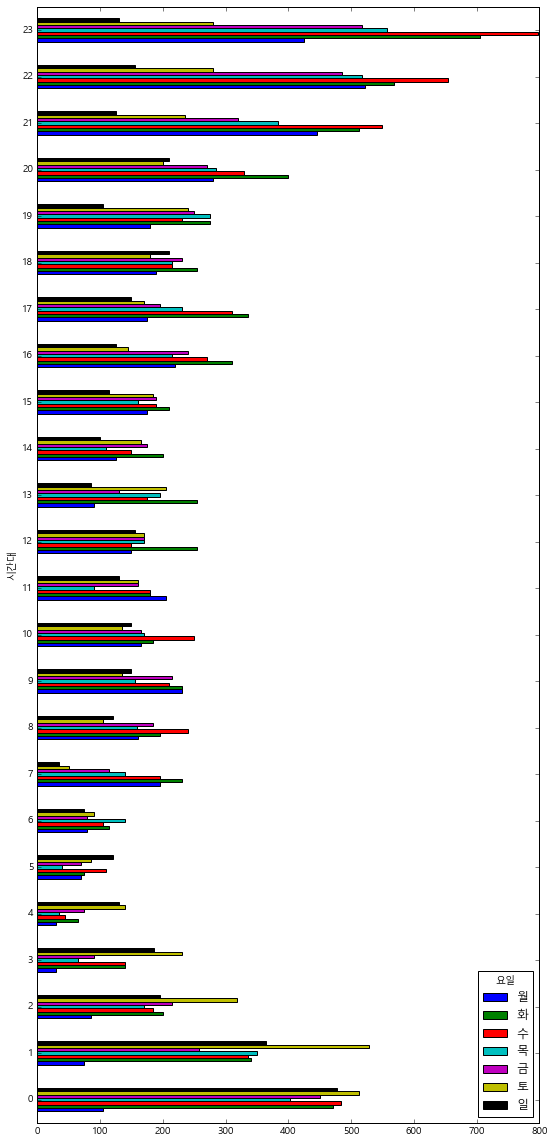

In [134]:
plt.show()

# 그룹별 연산 수행을 통한 분석
- 시간대별 통화건수

In [135]:
gs = df.groupby(["시간대"])
call_num = gs["통화건수"]

In [136]:
call_num.sum()

시간대
0     2904
1     2252
2     1368
3      881
4      520
5      570
6      685
7      960
8     1164
9     1325
10    1220
11    1105
12    1220
13    1135
14    1025
15    1225
16    1525
17    1565
18    1495
19    1555
20    1975
21    2572
22    3181
23    3411
Name: 통화건수, dtype: int64

In [137]:
df3 = call_num.agg(["sum"])
df3

,sum
시간대,
0,2904
1,2252
2,1368
3,881
4,520
5,570
6,685
7,960
8,1164


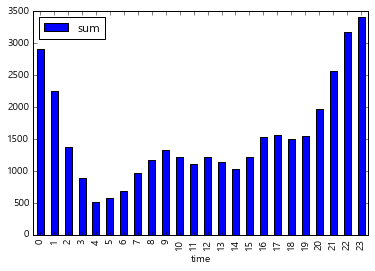

In [138]:
df3.plot(kind = "bar")
plt.xlabel("time")
plt.show()

시간대별 통화건수를 살펴보면, 21시 ~ 0시에 가장 많은 통화건수를 보이고 있음을 알 수 있다.

- 요일별 통화건수

In [139]:
gs = df.groupby(["요일"])
call_num = gs["통화건수"]
#call_num.sum()
df4 = call_num.agg(["sum"])
df4

,sum
요일,
금,5251
목,5229
수,6500
월,4407
일,3799
토,4945
화,6707


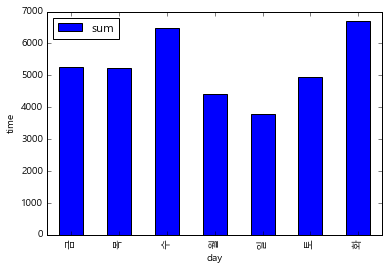

In [140]:
df4.plot(kind="bar")
plt.xlabel("day")
plt.ylabel("time")
plt.show()

요일별로는 금, 토요일에 통화건수가 많음을 알 수 있다. 

- 구별 통화건수

In [78]:
gs = df.groupby(["발신지_시군구"])
call_num = gs["통화건수"]
#call_num.sum()
df5 = call_num.agg(["sum"])
df5

,sum
발신지_시군구,
강남구,6007
강동구,4125
강북구,185
강서구,2670
관악구,545
광진구,170
구로구,725
금천구,480
노원구,355


In [79]:
# 구별 통화건수가 2000건을 넘는 구를 선정.
df6 = df5[df5["sum"] > 2000]
df6

,sum
발신지_시군구,
강남구,6007
강동구,4125
강서구,2670
서대문구,2136
서초구,3421
송파구,3042
영등포구,2137
중구,2594


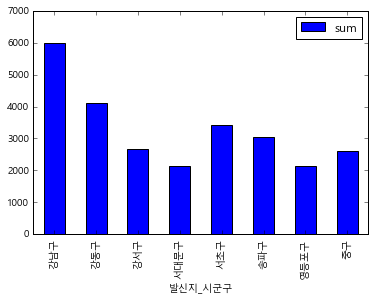

In [153]:
df6.plot(kind="bar")
plt.show()

- 동별 통화건수 확인

In [81]:
df7 =  df.pivot_table(["통화건수"], index=["발신지_시군구", "발신지_읍면동"], aggfunc='sum')
df7

통화건수
발신지_시군구 발신지_읍면동      
강남구     개포동       410
        논현동      1188
        대치동       170
        도곡동       120
        삼성동      1466
        세곡동       225
        수서동       175
        신사동       350
        역삼동      1828
        일원동        65
        청담동        10
강동구     강일동       905
        고덕동        95
        길동        335
        둔촌동        20
        명일동       170
        상일동       980
        성내동      1325
        암사동        25
        천호동       270
강북구     미아동       180
        번동          5
강서구     가양동       260
        내발산동     1030
        등촌동       260
        방화동       530
        염창동       115
        오곡동        30
        외발산동       50
        화곡동       395
...               ...
종로구     인의동        45
        재동         30
        적선동       105
        종로3가       90
        종로5가       25
        종로6가       60
        청진동        10
        평창동        30
        행촌동        20
중구      남대문로1가    185
        남대문로2가     15
        명동2가       25
        소공동         5
        수표동       170
        수하동      1019
        순화동        50
        신당동       630
        예장동         5
        을지로3가      50
        입정동        15
        저동1가       20
        주교동        80
        충무로1가      65
        충무로4가     145
        태평로2가     110
        필동2가        5
중랑구     망우동        20
        면목동       110
        묵동         15
        신내동        10

[188 rows x 1 columns]

#### 통화건수가 가장 높은 강남구, 강동구에 대한 통화콜수를 표시해 본다.

In [83]:
df8 = df[ (df["발신지_시군구"] == "강남구") | (df["발신지_시군구"] == "강동구") ]
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 7304
Data columns (total 7 columns):
기준년월일      2001 non-null int64
요일         2001 non-null object
시간대        2001 non-null int64
발신지_시도     2001 non-null object
발신지_시군구    2001 non-null object
발신지_읍면동    2001 non-null object
통화건수       2001 non-null int64
dtypes: int64(3), object(4)
memory usage: 93.8+ KB


In [123]:
df9 = df8.pivot_table(["통화건수"], index=["발신지_시군구", "발신지_읍면동"], aggfunc='sum')
df9

통화건수
발신지_시군구 발신지_읍면동      
강남구     개포동       410
        논현동      1188
        대치동       170
        도곡동       120
        삼성동      1466
        세곡동       225
        수서동       175
        신사동       350
        역삼동      1828
        일원동        65
        청담동        10
강동구     강일동       905
        고덕동        95
        길동        335
        둔촌동        20
        명일동       170
        상일동       980
        성내동      1325
        암사동        25
        천호동       270

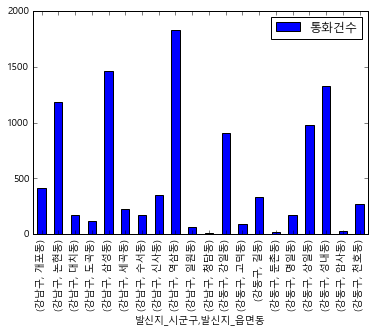

In [152]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rc('font') 
df9.plot(kind="bar")
plt.show()

#### 통화건수가 높은 강남구와 강동구에 대해서 동단위로 통화건수를 그래프로 표시해 봤고, 그래프를 보면 
#### 강남구-역삼동이 통화콜수가 가장 높은 것을 또한 확인할 수 있다.

In [126]:
# 한글 columns사용시 일부 함수가 적용되지 않아, 영문 Columns으로 변경해서 분석을 진행했다.
df.columns = ['calendar', 'day', 'time', 'city' , 'gu', 'dong', 'callnum' ] 
df

,calendar,day,time,city,gu,dong,callnum
0,20161101,화,0,서울특별시,강남구,역삼동,5
1,20161101,화,0,서울특별시,강남구,논현동,5
2,20161101,화,0,서울특별시,강남구,삼성동,5
3,20161101,화,0,서울특별시,강동구,상일동,5
4,20161101,화,0,서울특별시,강동구,길동,5
5,20161101,화,0,서울특별시,노원구,상계동,5
6,20161101,화,0,서울특별시,도봉구,창동,5
7,20161101,화,0,서울특별시,동작구,신대방동,5
8,20161101,화,0,서울특별시,마포구,합정동,5
9,20161101,화,0,서울특별시,서대문구,홍제동,5


In [87]:
df_gu = df[df.gu.isin(['강남구', '강동구'])]

In [88]:
def get_top_call(group, key, n=5):
    totals = group.groupby(key)["callnum"].sum()
   
    return totals.sort_values(ascending=False)[:n]

In [141]:
grouped = df_gu.groupby('gu')
df10 = grouped.apply(get_top_call, 'dong', n=5)
df10

gu   dong
강남구  역삼동     1828
     삼성동     1466
     논현동     1188
     개포동      410
     신사동      350
강동구  성내동     1325
     상일동      980
     강일동      905
     길동       335
     천호동      270
Name: callnum, dtype: int64

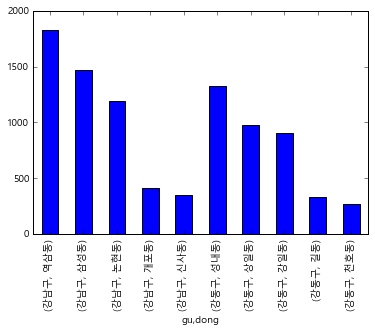

In [142]:
df10.plot(kind="bar")
plt.show()

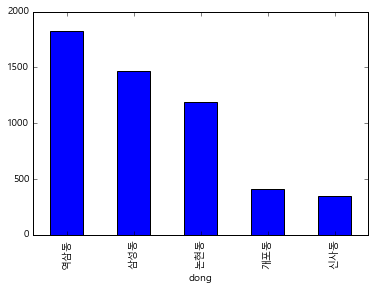

In [149]:
# 3. 강남구에 대해서만 동에 대한 통화콜수를 확인해 본다.
df11 = grouped.apply(get_top_call, 'dong', n=5).reset_index(0)
df11[df11.gu == "강남구"].callnum.plot(kind="bar", color='b')
plt.show()

#### 상기 그래프에서 강남구에서는 역삼동에서 통화콜수가 가장 많음을 알 수 있다.